In [108]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib as plt
import statsmodels as stm

In [13]:
df = pd.read_csv('data/df_stat.csv')
loc_meta = pd.read_csv('data/airqo_metadata.csv')

In [4]:
df.head()

,Unnamed: 0,ID,location,target,max_temp,min_temp,mean_temp,std_temp,var_temp,median_temp,...,var_wind_spd,median_wind_spd,ptp_wind_spd,max_atmos_press,min_atmos_press,mean_atmos_press,std_atmos_press,var_atmos_press,median_atmos_press,ptp_atmos_press
0,0,ID_train_0,C,45.126304,27.208333,19.275000,22.299527,2.594011,6.728895,21.358333,...,0.155268,0.666250,1.355000,87.871667,87.614167,87.752434,0.070374,0.004952,87.762083,0.257500
1,1,ID_train_1,D,79.131702,33.616667,17.983333,24.679063,4.266955,18.206903,23.791667,...,0.290736,0.744167,2.760833,90.725000,90.056667,90.429924,0.156000,0.024336,90.429167,0.668333
2,2,ID_train_10,A,32.661304,31.841667,18.458333,24.112317,3.776377,14.261020,23.304167,...,0.342484,0.942500,2.420000,88.813333,87.982500,88.420931,0.179481,0.032213,88.425000,0.830833
3,3,ID_train_100,A,53.850238,27.491667,16.941667,20.845273,3.080140,9.487259,19.541667,...,0.336701,1.388333,2.469167,88.685000,87.965000,88.376915,0.161758,0.026166,88.400000,0.720000
4,4,ID_train_1000,A,177.418750,28.750000,17.525000,21.870732,3.286870,10.803515,20.950000,...,0.181690,0.542917,1.796667,88.719167,88.268333,88.538104,0.118369,0.014011,88.552500,0.450833


In [6]:
df.columns

Index(['Unnamed: 0', 'ID', 'location', 'target', 'max_temp', 'min_temp',
       'mean_temp', 'std_temp', 'var_temp', 'median_temp', 'ptp_temp',
       'max_precip', 'min_precip', 'mean_precip', 'std_precip', 'var_precip',
       'median_precip', 'ptp_precip', 'max_rel_humidity', 'min_rel_humidity',
       'mean_rel_humidity', 'std_rel_humidity', 'var_rel_humidity',
       'median_rel_humidity', 'ptp_rel_humidity', 'max_wind_dir',
       'min_wind_dir', 'mean_wind_dir', 'std_wind_dir', 'var_wind_dir',
       'median_wind_dir', 'ptp_wind_dir', 'max_wind_spd', 'min_wind_spd',
       'mean_wind_spd', 'std_wind_spd', 'var_wind_spd', 'median_wind_spd',
       'ptp_wind_spd', 'max_atmos_press', 'min_atmos_press',
       'mean_atmos_press', 'std_atmos_press', 'var_atmos_press',
       'median_atmos_press', 'ptp_atmos_press'],
      dtype='object')

In [130]:
df.value_counts('location')

location
A    5122
D    4990
E    2907
C    1753
B     767
dtype: int64

In [134]:
df['target'].describe()

count    15539.000000
mean        58.242429
std         42.373700
min          1.452619
25%         33.482625
50%         46.504048
75%         68.569062
max        475.820000
Name: target, dtype: float64

In [57]:
df.sort_values(by='location', inplace=True)

In [14]:
loc_meta

,Unnamed: 0,location,loc_altitude,km2,aspect,dist_motorway,dist_trunk,dist_primary,dist_secondary,dist_tertiary,dist_unclassified,dist_residential,popn,hh,hh_cook_charcoal,hh_cook_firewood,hh_burn_waste
0,0,A,1122.4,1.9,194.0,NaN,NaN,14.695789,343.595039,575.917422,330.609776,254.307415,4763,809,508,43,142
1,1,B,1155.4,5.4,219.8,NaN,528.078476,2172.680462,1144.376412,531.103271,65.142004,1.042809,22243,5735,116,1144,239
2,2,C,1178.3,8.5,168.7,NaN,32.885520,4794.704552,12.730489,72.459340,406.967815,13.931350,97895,26873,21316,751,9835
3,3,D,980.8,0.8,90.0,NaN,NaN,265.896472,NaN,339.693908,76.024389,11.601442,3596,663,7,651,99
4,4,E,1186.5,1.6,121.0,NaN,850.423131,NaN,1738.872942,137.722087,449.591885,3.836589,6064,1297,985,26,43


## Temperature

Temperature differs a lot by location. Location A has very unstable temperature. Location B and C are more stable.

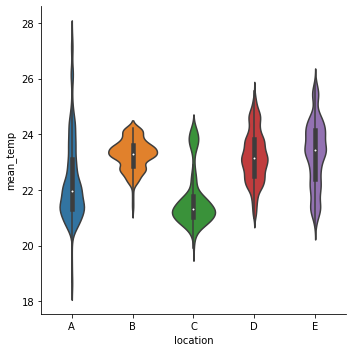

In [58]:
sns.catplot(x="location", y="mean_temp", data=df, kind="violin");

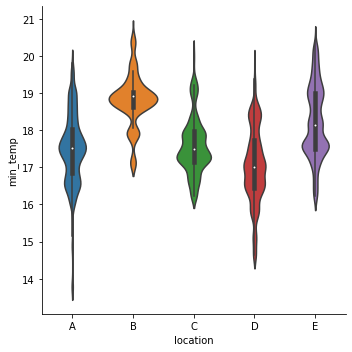

In [59]:
sns.catplot(x="location", y="min_temp", data=df, kind="violin");

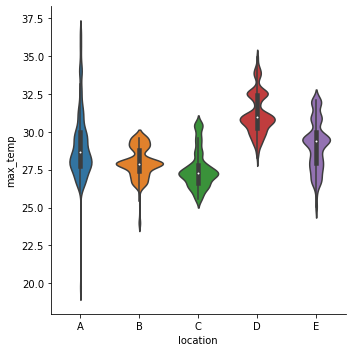

In [60]:
sns.catplot(x="location", y="max_temp", data=df, kind="violin");

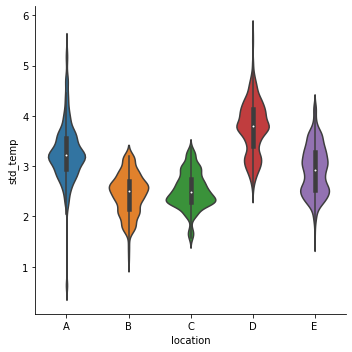

In [61]:
sns.catplot(x="location", y="std_temp", data=df, kind="violin");

## Precipitation

There was no rain in location B at all. Most rain was in location C.

In [129]:
df.groupby(['location']).mean()['mean_precip']

location
A    0.190552
B    0.000000
C    0.274311
D    0.113897
E    0.187376
Name: mean_precip, dtype: float64

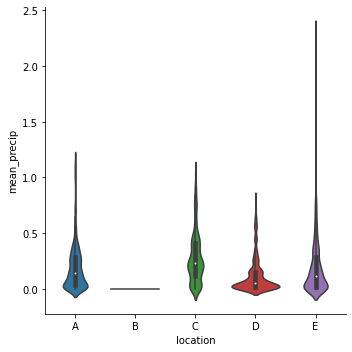

In [63]:
sns.catplot(x="location", y="mean_precip", data=df, kind="violin");

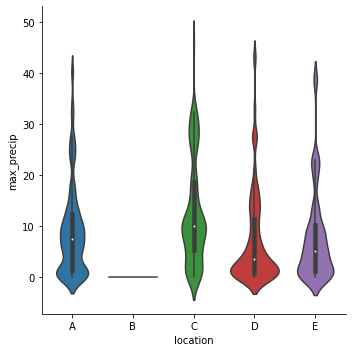

In [64]:
sns.catplot(x="location", y="max_precip", data=df, kind='violin');#

## Humidity

There is a wet climate.

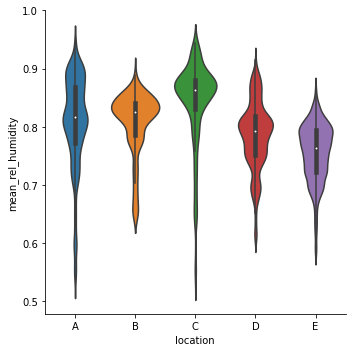

In [65]:
sns.catplot(x="location", y="mean_rel_humidity", data=df, kind="violin");

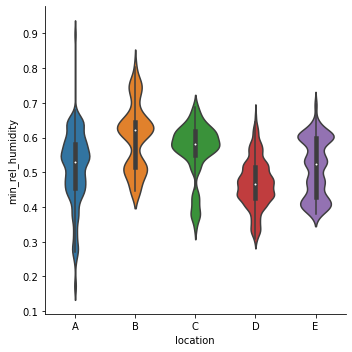

In [86]:
sns.catplot(x="location", y="min_rel_humidity", data=df, kind="violin");

## Wind Direction

Wind comes mostly from one direction.

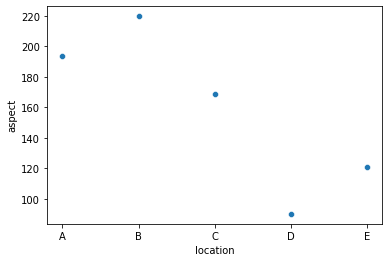

In [66]:
sns.scatterplot(x="location", y="aspect", data=loc_meta);

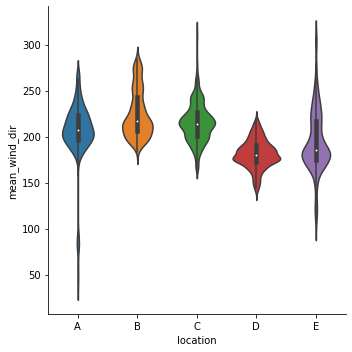

In [67]:
sns.catplot(x="location", y="mean_wind_dir", data=df, kind="violin");#

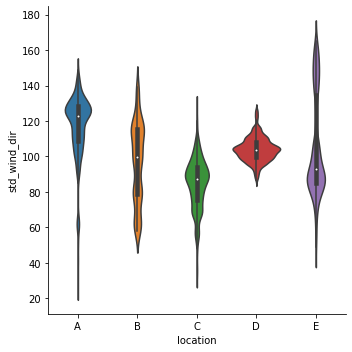

In [68]:
sns.catplot(x="location", y="std_wind_dir", data=df, kind="violin");

## Wind Speed

Location B and E are a bit more windy. Rare storms happen in location C. Mostly just (very) light wind.

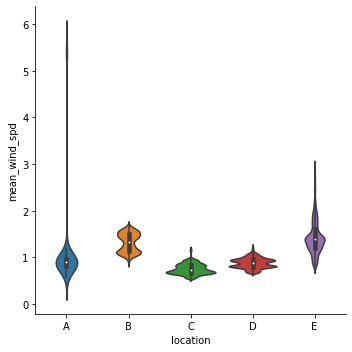

In [69]:
sns.catplot(x="location", y="mean_wind_spd", data=df, kind="violin");

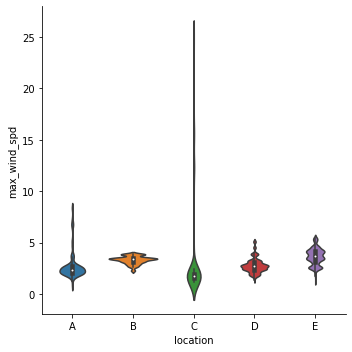

In [87]:
sns.catplot(x="location", y="max_wind_spd", data=df, kind="violin");

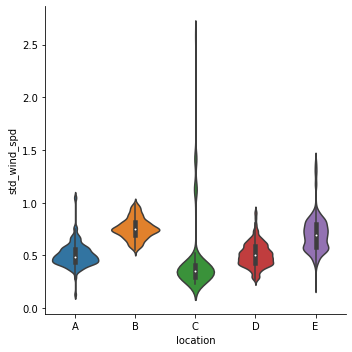

In [70]:
sns.catplot(x="location", y="std_wind_spd", data=df, kind="violin");

## Atmospheric Pressure

Location D is located far lower than the other locations. Therefore here the atmospheric pressure is higher.

Might depend on temperature.

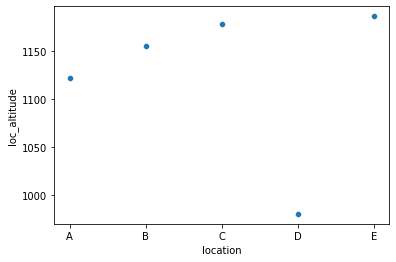

In [71]:
sns.scatterplot(x="location", y="loc_altitude", data=loc_meta);

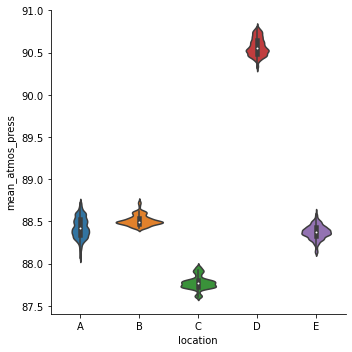

In [72]:
sns.catplot(x="location", y="mean_atmos_press", data=df, kind="violin");

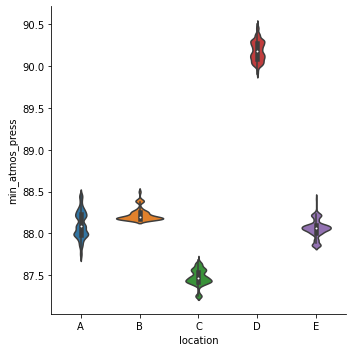

In [73]:
sns.catplot(x="location", y="min_atmos_press", data=df, kind="violin");

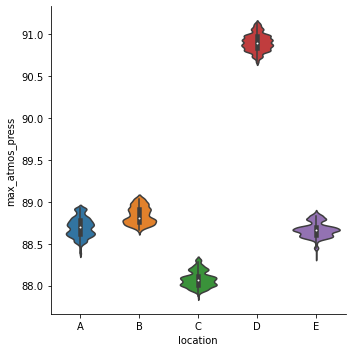

In [74]:
sns.catplot(x="location", y="max_atmos_press", data=df, kind="violin");

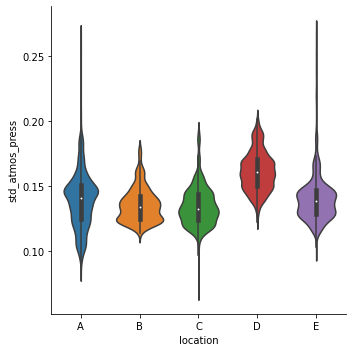

In [75]:
sns.catplot(x="location", y="std_atmos_press", data=df, kind="violin");

## Target

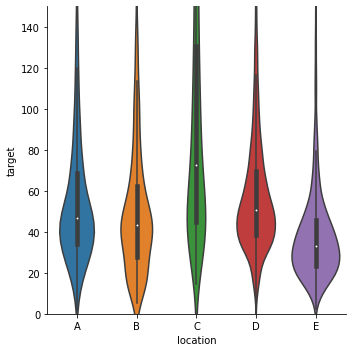

In [88]:
sns.catplot(x="location", y="target", data=df, kind="violin").set(ylim=(0,150));

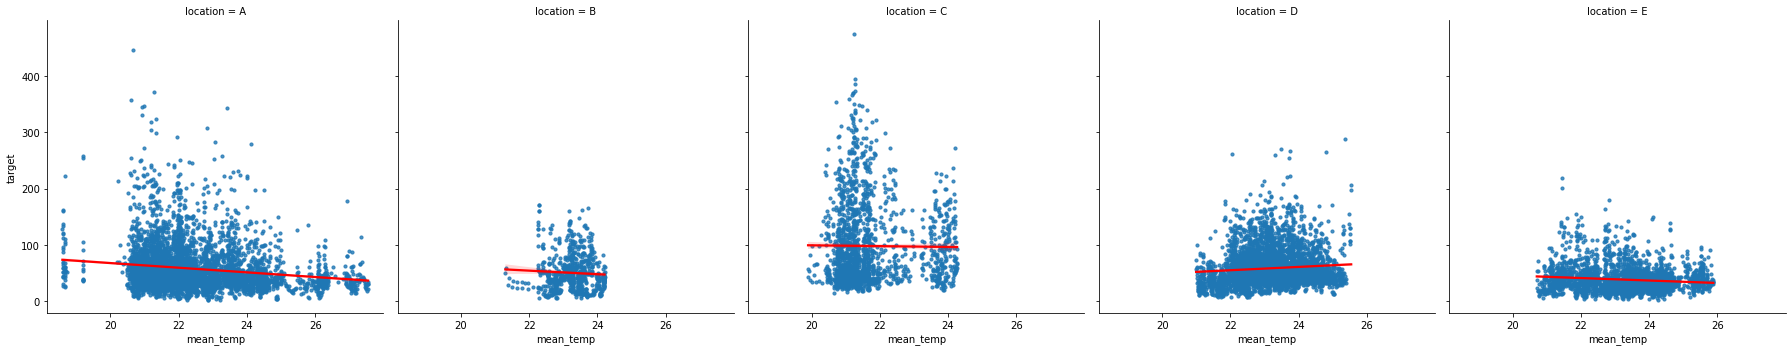

In [118]:
sns.lmplot(x="mean_temp", y="target", col='location', scatter_kws={"s": 10}, line_kws={'color': 'red'}, data=df);

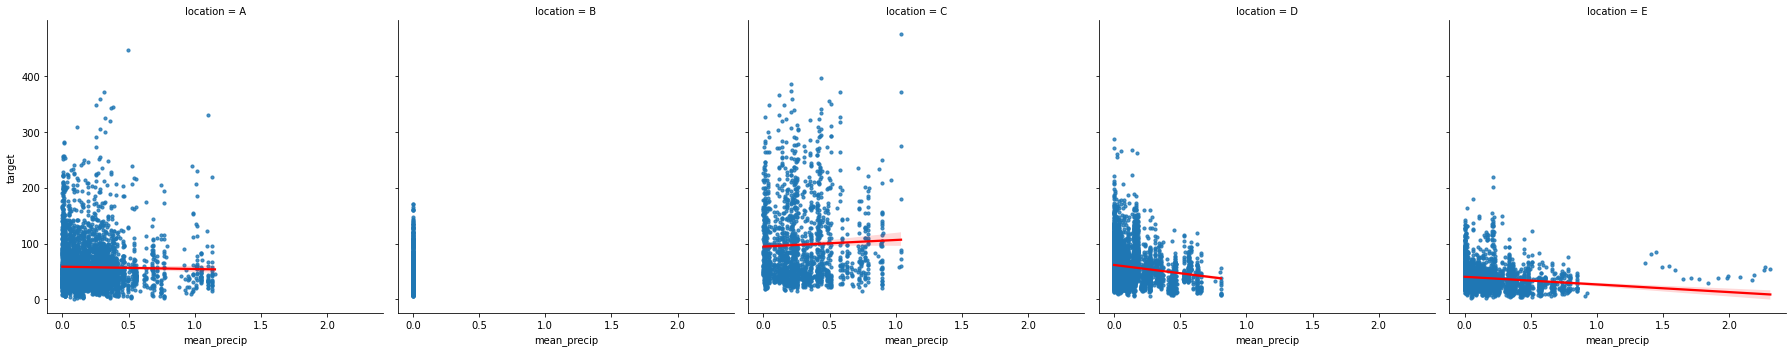

In [124]:
sns.lmplot(x="mean_precip", y="target", col='location', scatter_kws={"s": 10}, line_kws={'color': 'red'}, data=df);

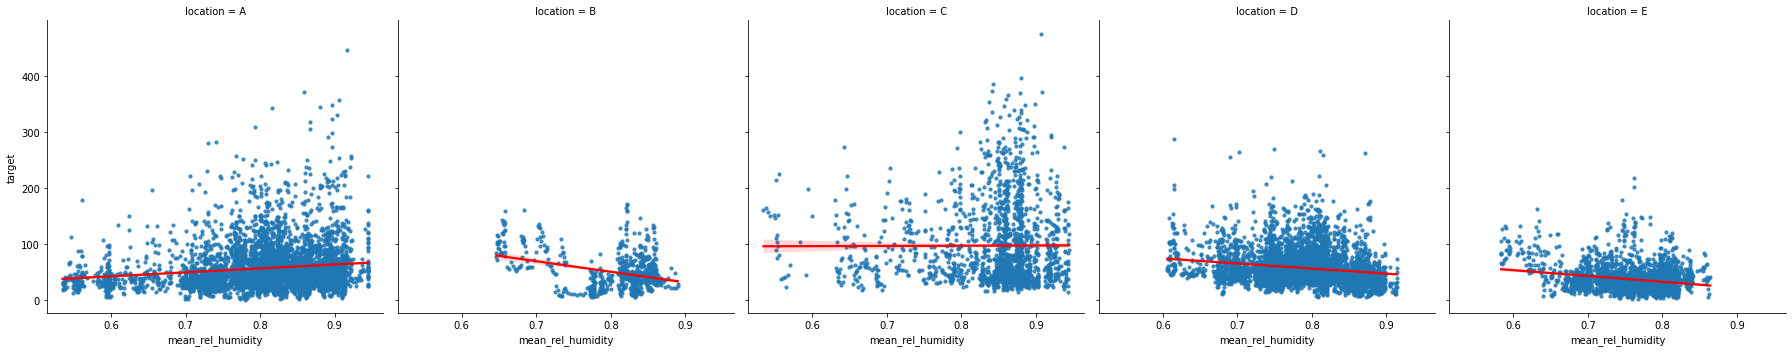

In [121]:
sns.lmplot(x="mean_rel_humidity", y="target", col='location', scatter_kws={"s": 10}, line_kws={'color': 'red'}, data=df);

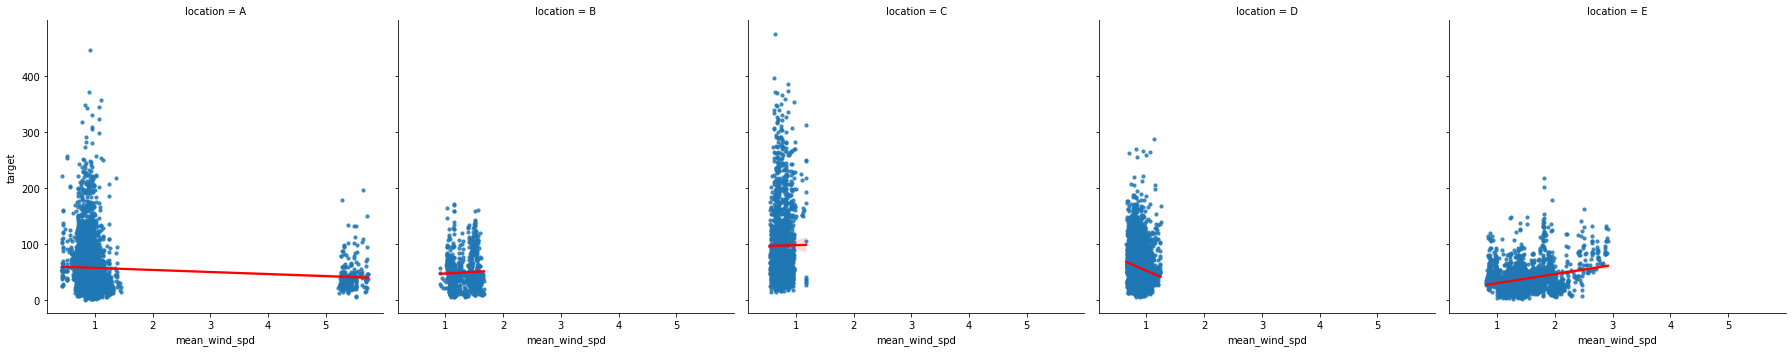

In [117]:
sns.lmplot(x="mean_wind_spd", y="target", col='location', scatter_kws={"s": 10}, line_kws={'color': 'red'}, data=df);

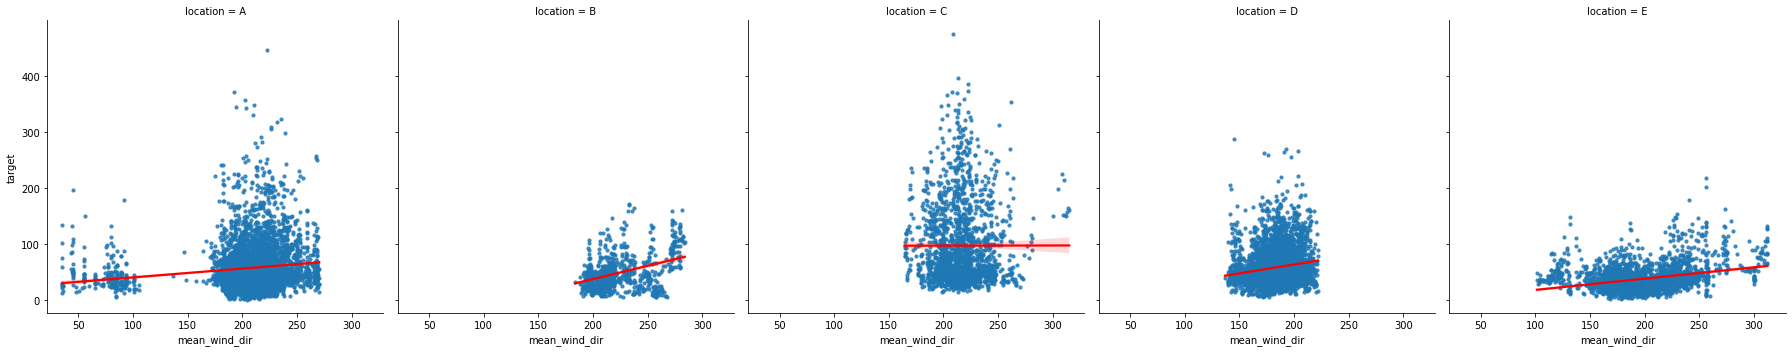

In [123]:
sns.lmplot(x="mean_wind_dir", y="target", col='location', scatter_kws={"s": 10}, line_kws={'color': 'red'}, data=df);

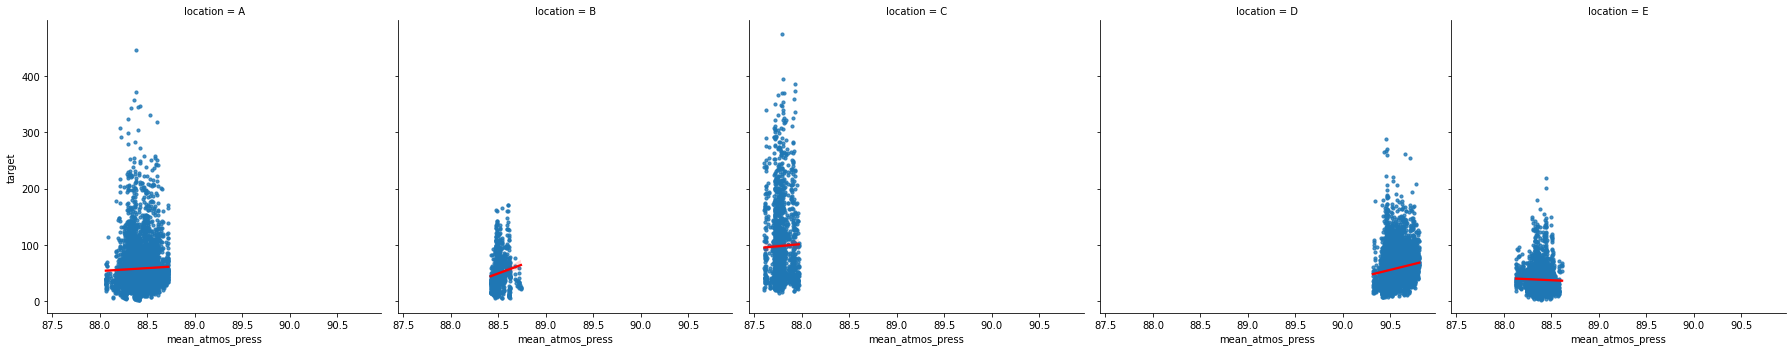

In [120]:
sns.lmplot(x="mean_atmos_press", y="target", col='location', scatter_kws={"s": 10}, line_kws={'color': 'red'}, data=df);

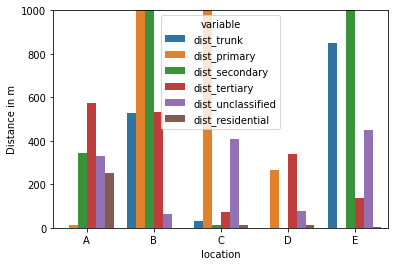

In [55]:
roads = loc_meta.melt(id_vars='location',value_vars=['dist_trunk','dist_primary','dist_secondary','dist_tertiary','dist_unclassified','dist_residential'])
sns.barplot(x="location", y="value", hue='variable', data=roads).set(ylim=(0,1000),ylabel='Distance in m');

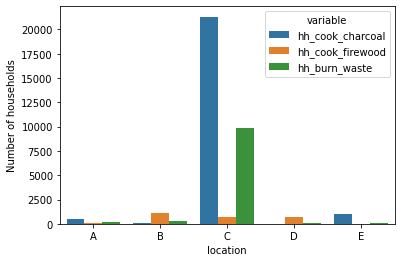

In [77]:
fire = loc_meta.melt(id_vars='location',value_vars=['hh_cook_charcoal','hh_cook_firewood','hh_burn_waste'])
sns.barplot(x="location", y="value", hue='variable', data=fire).set(ylabel='Number of households');

## Scatterplots

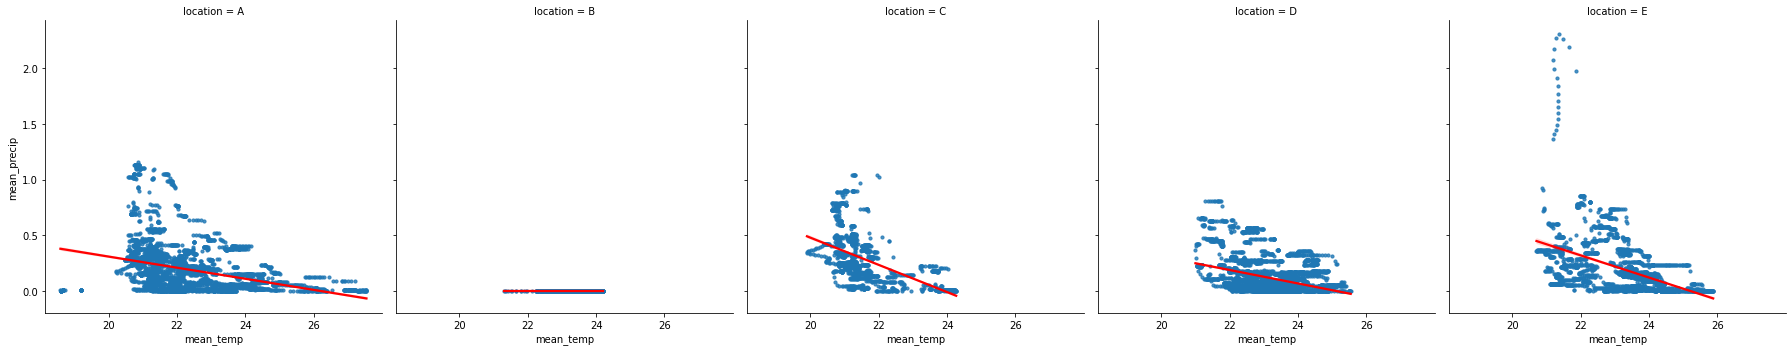

In [103]:
sns.lmplot(x="mean_temp", y="mean_precip", col='location', scatter_kws={"s": 10}, line_kws={'color': 'red'}, data=df);

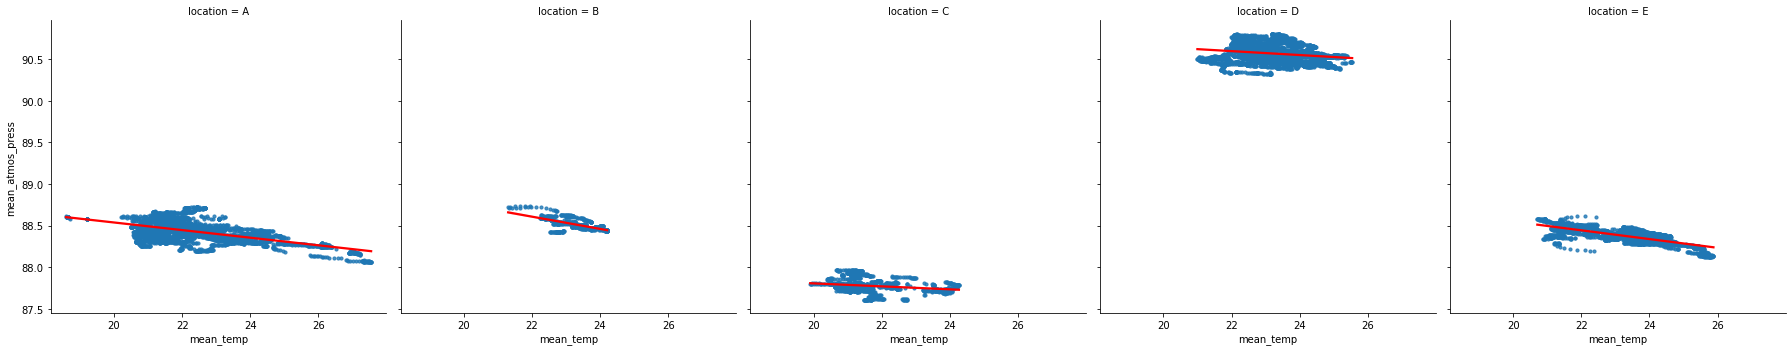

In [104]:
sns.lmplot(x="mean_temp", y="mean_atmos_press", col='location', scatter_kws={"s": 10}, line_kws={'color': 'red'}, data=df);

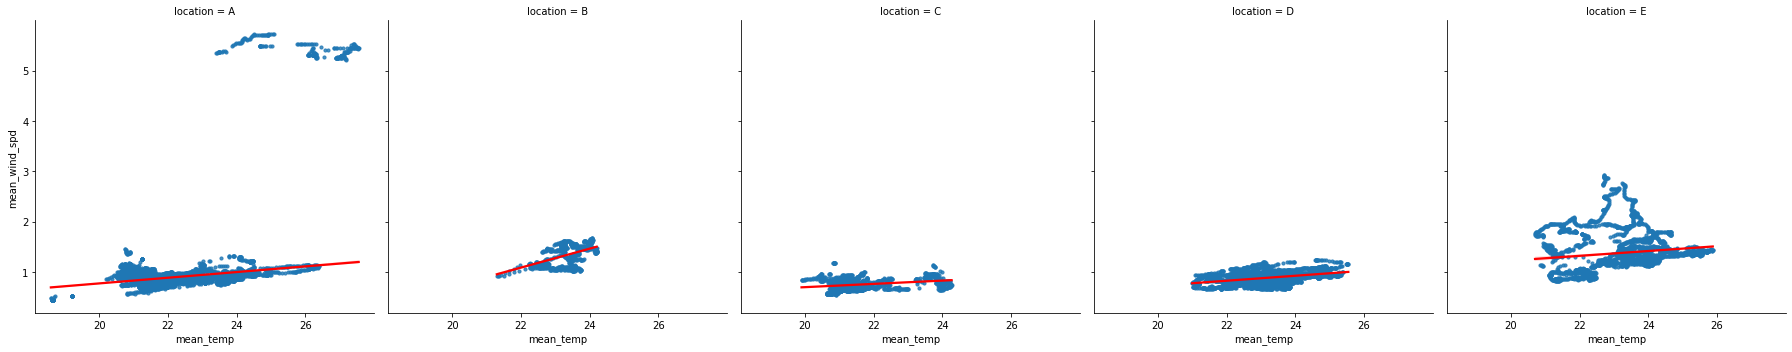

In [109]:
sns.lmplot(x="mean_temp", y="mean_wind_spd", col='location', robust=True, scatter_kws={"s": 10}, line_kws={'color': 'red'}, data=df);

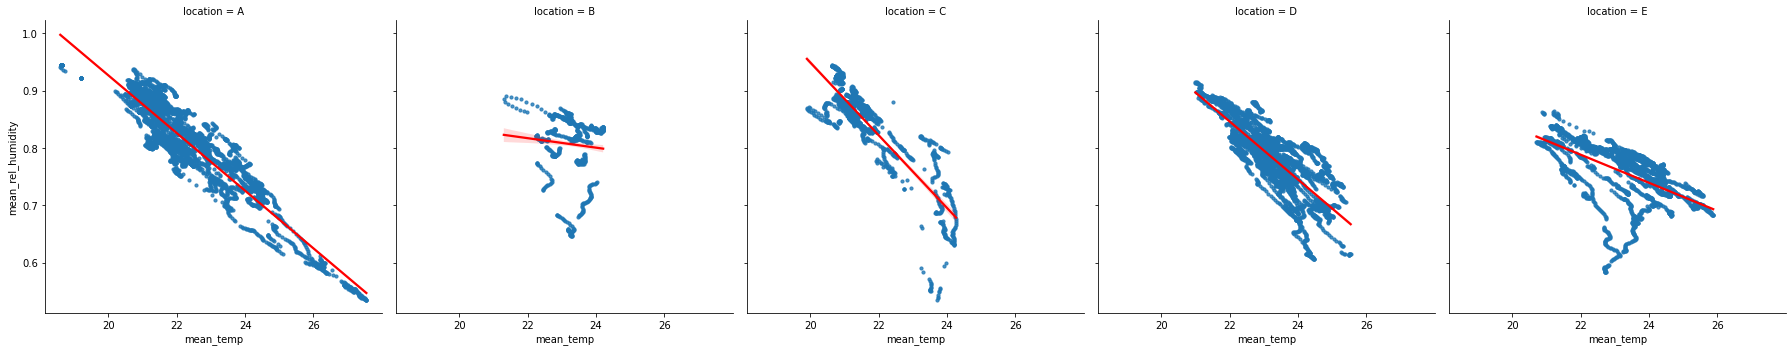

In [110]:
sns.lmplot(x="mean_temp", y="mean_rel_humidity", col='location', scatter_kws={"s": 10}, line_kws={'color': 'red'}, data=df);

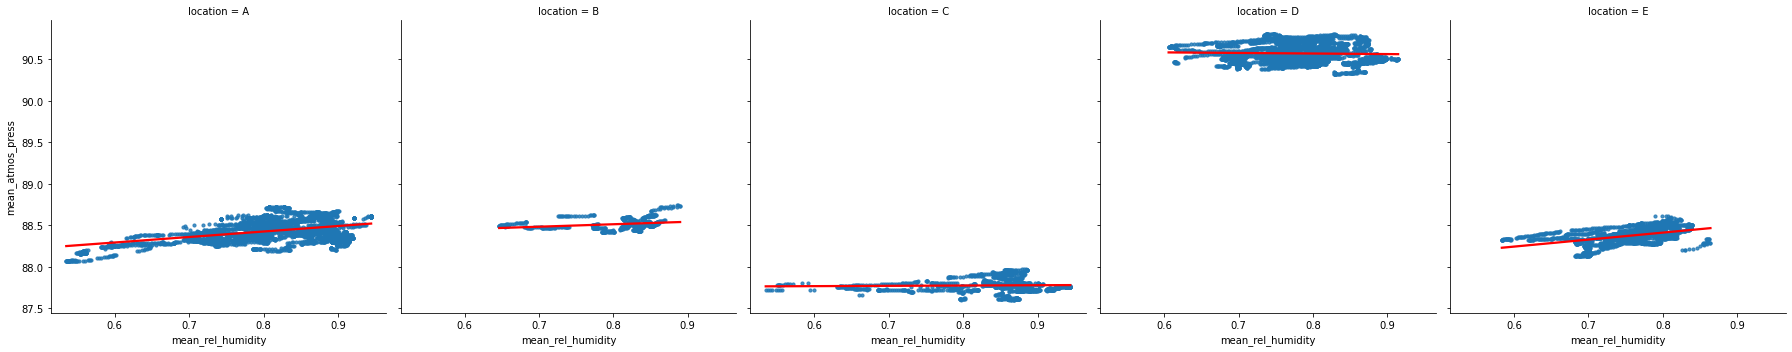

In [113]:
sns.lmplot(x="mean_rel_humidity", y="mean_atmos_press", col='location', scatter_kws={"s": 10}, line_kws={'color': 'red'}, data=df);

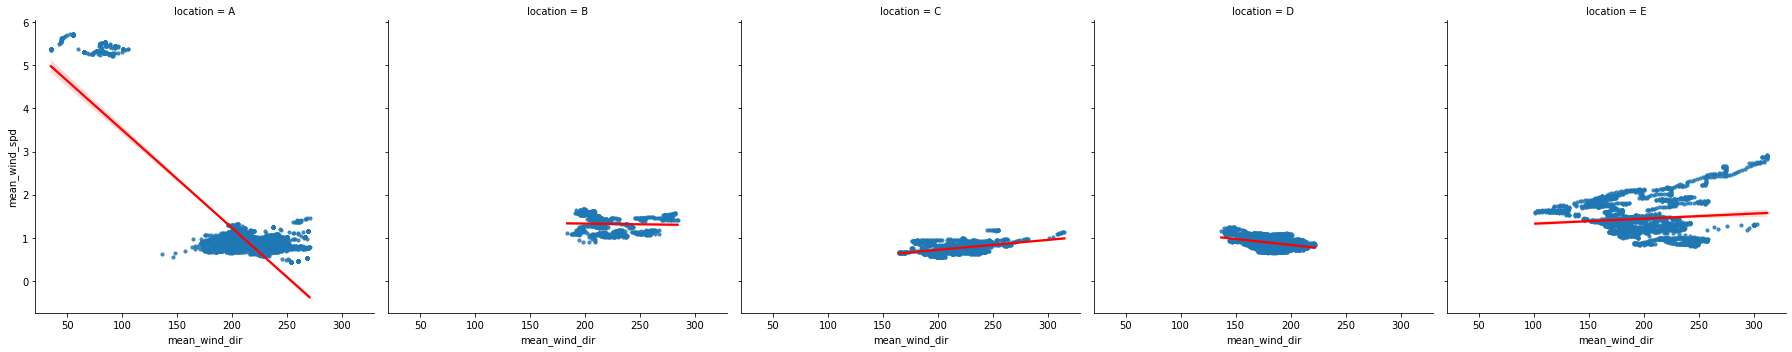

In [114]:
sns.lmplot(x="mean_wind_dir", y="mean_wind_spd", col='location', scatter_kws={"s": 10}, line_kws={'color': 'red'}, data=df);